### Q1 Global Histogram Equalization

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from collections import OrderedDict

In [2]:
img = cv2.imread("picture.png", 2)
[height, width] = img.shape
[height, width]

[512, 512]

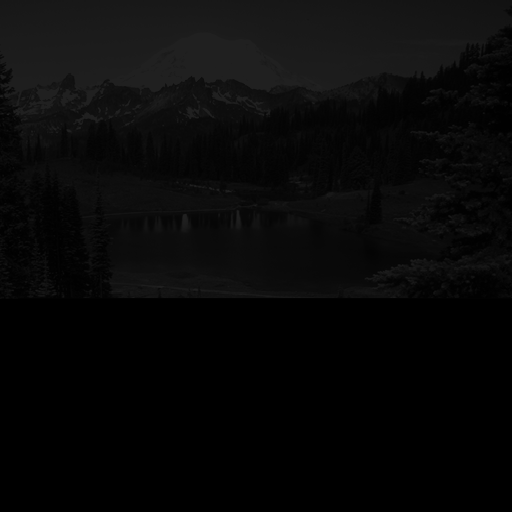

In [3]:
Image.fromarray(img)

In [4]:
def drawbar(dictionary):
    plt.bar(dictionary.keys(), dictionary.values())
    plt.xlabel("frequency")
    plt.ylabel("Pixel Intensity")
    plt.show

In [5]:
def histogramEqualization(img, im2, heightS, heightE, widthS, widthE):
    plotdata = OrderedDict.fromkeys(xrange(256), 0)
    freqdict = {}
    totalpixels = img.size
    
    # Calculate the frequency distribution
    for x in range(heightS, heightE):
        for y in range(widthS, widthE):
            i = img[x][y]
            plotdata[i] = plotdata[i] + 1 
            
    # Testing our work. CF should be 1
    for index, freq in plotdata.iteritems():
        freqdict[index] = float(freq) / totalpixels
    
    CF = sum(freqdict.values())

    drawbar(plotdata)

    mapdict = dict()
    cf = 0
    for x, y in freqdict.iteritems():
        cf = cf + y
        mapdict[x] = int(cf * 255)

    for x in range(heightS, heightE):
        for y in range(widthS, widthE):
            i = img[x][y]
            im2[x][y] = mapdict[i]

    im = Image.fromarray(im2)
    #im.show()

    plotdata = OrderedDict.fromkeys(xrange(256), 0)
    for x in range(heightS, heightE):
        for y in range(widthS, widthE):
            i = im2[x][y]
            plotdata[i] = plotdata[i] + 1 
    #drawbar(plotdata)
    return im, plotdata

In [6]:
im2 = np.zeros(img.shape, np.uint8)

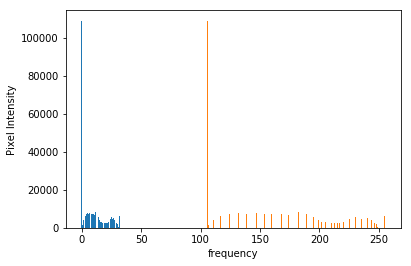

In [7]:
im , plotdata = histogramEqualization(img, im2, 0, img.shape[0], 0, img.shape[1])
im.show()
drawbar(plotdata)

### Tiling approach

In [8]:
im3 = np.zeros(img.shape, np.uint8)

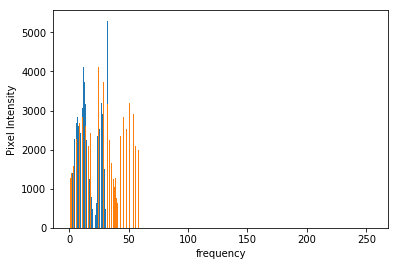

In [9]:
im , plotdata = histogramEqualization(img, im3, 0, img.shape[0]/2, 0, img.shape[1]/2)
drawbar(plotdata)
im

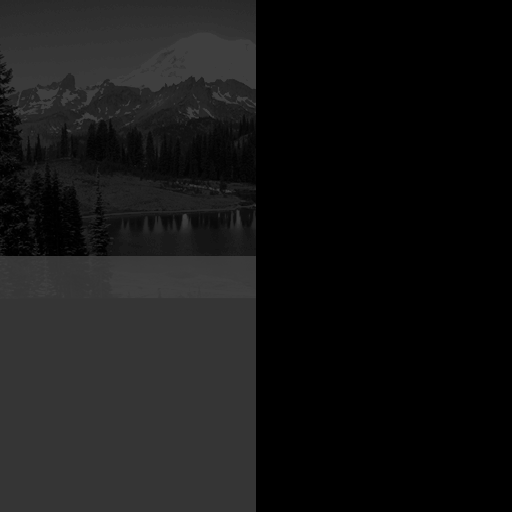

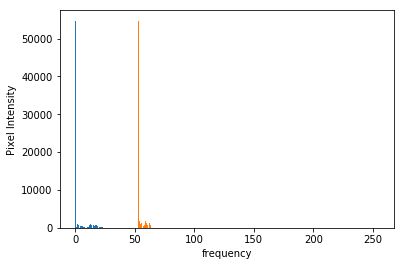

In [10]:
im , plotdata = histogramEqualization(img, im3, img.shape[0]/2, img.shape[0] , 0, img.shape[1]/2)
drawbar(plotdata)
im

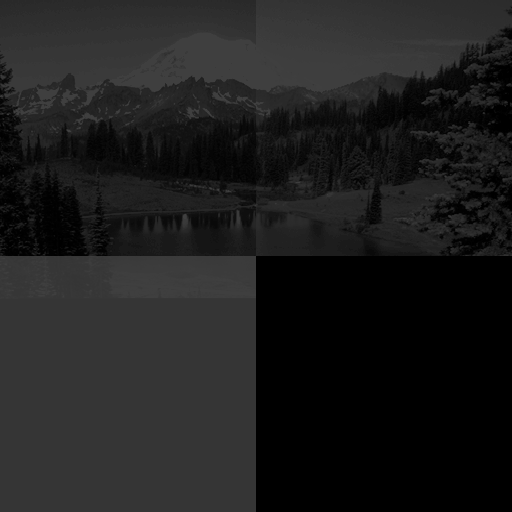

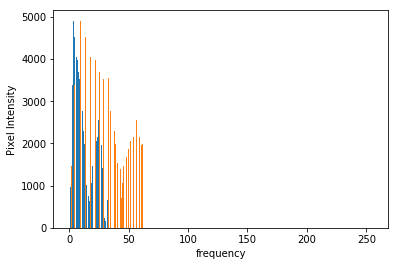

In [11]:
im , plotdata = histogramEqualization(img, im3, 0, img.shape[0]/2 , img.shape[1]/2, img.shape[1])
drawbar(plotdata)
im

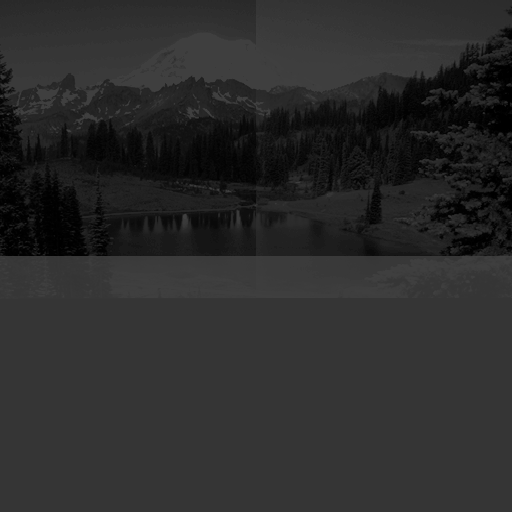

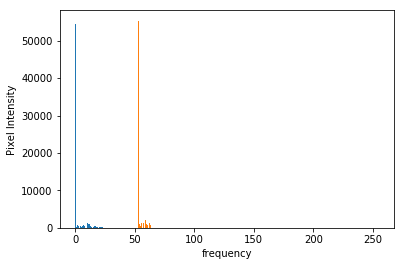

In [12]:
im , plotdata = histogramEqualization(img, im3, img.shape[0]/2, img.shape[0] , img.shape[1]/2, img.shape[1])
drawbar(plotdata)
im

#### Sliding window approach

In [13]:
im4 = np.zeros(img.shape, np.uint8)

In [ ]:
for y in range(height):
    for x in range(width):
        miniH = y-1 if (y-1) >= 0 else y
        maxH  = y+1 if (y+1) < height else y
        miniW = x-1 if (x-1) >= 0 else x
        maxW  = x+1 if (x+1) < width else x
        im , plotdata = histogramEqualization(img, im4, miniH, maxH , miniW, maxW)
    print (y)
drawbar(plotdata)
im

KeyboardInterrupt: 